<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 10 - HANDS ON MACHINE LEARNING**
## **Una introduccion a las redes neuronales con Keras**



En este capitulo vamos a introducir por primera vez la API Keras. En particular vamos a utilizar la implementacion para TensorFlow.

In [1]:
!python3 -m pip install --upgrade tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
print('Version de Tensor Flow ==> ',tf.__version__)
print('Version de Keras ==> ',keras.__version__)

Version de Tensor Flow ==>  2.5.0
Version de Keras ==>  2.5.0


La version de keras no termina con un -tf tal como dice el libro. ¿Por que?

Vamos a tratar de resolver un problema de clasificacion de imagenes. En particular vamos a trabajar con un dataset incluido en Keras.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Forma del dataset =  (60000, 28, 28)
Maximo =  255  Minimo =  0
[0 1 2 3 4 5 6 7 8 9]


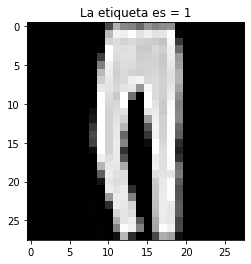

In [4]:
print('Forma del dataset = ',X_train_full.shape)
import matplotlib.pyplot as plt
import numpy as np
N = 285
plt.figure()
plt.imshow(X_train_full[N],cmap='gray', vmin=0, vmax=255)
plt.title("La etiqueta es = " +  str(int(y_train_full[N])))
print("Maximo = ",X_train_full.max()," Minimo = ",X_train_full.min())
print(np.unique(y_train_full))

En total tenemos $60$ mil imagenes en el conujunto de train. Las imagenes son matrices de $28 \times 28$ que representan prendas de vestir. Cada elemento de imagen tiene un valor que va entre $0$ y $255$. En total tenemos $10$ clases que debemos poder clasificar. Estas clases estan etiquetadas por un entero entre $[0,9]$.

A su vez ya podemos notar que tenemos una division entre Train y Test pero no tenemos un conjunto de validacion. Vamos a hacer este split y ademas vamos a normalizar los valores llevandolos del $[0,255] \rightarrow [0,1]$.

In [5]:
X_valid = X_train_full[:5000]/255
X_train = X_train_full[5000:]/255
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]
print(len(X_train))
print(len(X_valid))

55000
5000


Las clases el libro dicen que son las siguientes:

Text(0.5, 1.0, 'La etiqueta es = Bolso')

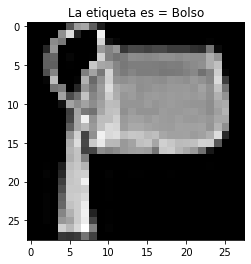

In [6]:
class_names = ["Remera","Pantalon","Pullover","Vestido","Saco","Sandalia","Camisa","Zapatilla","Bolso","Bota"]
plt.figure()
plt.imshow(X_train[N],cmap='gray', vmin=0, vmax=1)
plt.title("La etiqueta es = " +  class_names[y_train[N]])

Vamos a crear una red usando un diseño secuencial.

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128,activation="relu"))
#model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7476 - accuracy: 0.7616 - val_loss: 0.5470 - val_accuracy: 0.8152
Epoch 2/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5186 - accuracy: 0.8235 - val_loss: 0.4831 - val_accuracy: 0.8380
Epoch 3/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4736 - accuracy: 0.8369 - val_loss: 0.4559 - val_accuracy: 0.8456
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4477 - accuracy: 0.8440 - val_loss: 0.4304 - val_accuracy: 0.8538
Epoch 5/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4307 - accuracy: 0.8497 - val_loss: 0.4103 - val_accuracy: 0.8596


{'loss': [0.7475749254226685, 0.5185546875, 0.47363296151161194, 0.44772258400917053, 0.4306893050670624], 'accuracy': [0.7616363763809204, 0.8235272765159607, 0.8369091153144836, 0.8439818024635315, 0.8496727347373962], 'val_loss': [0.5470229387283325, 0.483125239610672, 0.45590445399284363, 0.4304017722606659, 0.4103263318538666], 'val_accuracy': [0.8151999711990356, 0.8379999995231628, 0.8456000089645386, 0.8537999987602234, 0.8596000075340271]}


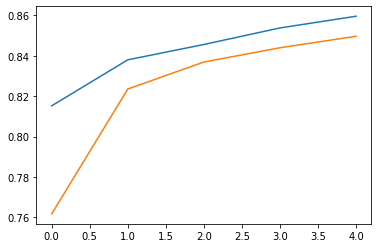

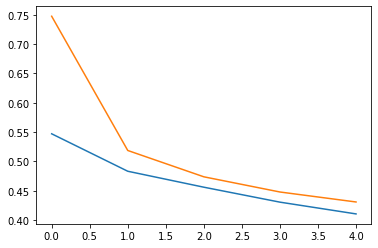

In [9]:
print(history.history)
plt.figure()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

Vamos a evaluar el modelo sobre el test. Primero vamos a buscar el reporte de clasificacion que calcula Scikit-Learn y luego dibujar una matriz de confusion.

In [17]:
y_test_pred = model.predict(X_test)
import pandas as pd
from sklearn.metrics import precision_score, recall_score, classification_report 
y_test_pred_categorical = np.argmax(y_test_pred, axis=-1)
reporte = classification_report(y_test, y_test_pred_categorical, target_names=class_names)
print(reporte)


              precision    recall  f1-score   support

      Remera       0.80      0.82      0.81      1000
    Pantalon       0.96      0.96      0.96      1000
    Pullover       0.73      0.68      0.70      1000
     Vestido       0.88      0.80      0.84      1000
        Saco       0.57      0.90      0.70      1000
    Sandalia       1.00      0.68      0.81      1000
      Camisa       0.70      0.38      0.49      1000
   Zapatilla       0.86      0.91      0.88      1000
       Bolso       0.90      0.96      0.93      1000
        Bota       0.78      0.97      0.87      1000

    accuracy                           0.80     10000
   macro avg       0.82      0.80      0.80     10000
weighted avg       0.82      0.80      0.80     10000

